# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("alldata.xlsx")  # Change this to the actual filename if needed

meta_cols = ['navn', 'parti', 'storkreds', 'alder']
question_cols = [col for col in df.columns if col not in meta_cols]

df_questions = df[question_cols].copy()

df_questions = df_questions.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
questions_scaled = scaler.fit_transform(df_questions)

df_scaled = pd.DataFrame(questions_scaled, columns=question_cols)

df_scaled.head()

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,-0.969068,-1.050586,0.974411,-0.626725,0.776943,0.730695,-0.770004,0.387687,0.824485,1.221737,...,-0.104115,-0.573668,1.660264,0.035293,0.412750,-1.465489,-0.864900,0.256268,0.333407,1.164317
1,1.140176,1.426255,-0.334364,-0.626725,-1.441310,-1.214584,1.482842,-1.585649,1.461587,-1.400159,...,-1.307690,-0.573668,-1.177486,0.035293,-1.206501,1.011273,1.170942,-1.616075,-0.639872,0.345612
2,1.140176,0.807044,-0.988752,-0.626725,0.037525,-1.214584,1.482842,-0.927870,0.824485,-0.744685,...,-0.104115,0.473427,-0.468049,-1.938816,-0.396875,1.011273,0.492328,-0.991961,0.333407,-1.291797
3,1.140176,0.807044,-0.988752,0.094883,0.037525,0.730695,1.482842,0.387687,0.824485,-1.400159,...,1.099459,1.520523,-1.177486,2.009401,1.222376,1.011273,1.849556,-0.991961,1.306686,0.345612
4,0.437094,0.807044,-0.988752,2.259705,-2.180728,0.730695,-0.770004,0.387687,1.461587,-1.400159,...,-0.104115,-0.573668,-1.177486,0.035293,-1.206501,-0.227108,-0.864900,-0.367846,1.306686,-1.291797


In [ ]:
df_full = pd.concat([df[meta_cols], df_scaled], axis=1)
party_means = df_full.groupby("parti")[question_cols].mean()
party_means.head()

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
parti,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.056226,0.890222,-0.920383,-0.497482,-1.275769,-0.982312,0.193900,-0.083557,0.919575,-1.028398,...,0.219233,0.614082,-0.806885,0.197346,-0.517715,0.410566,0.603742,-0.060446,-0.160496,-0.204264
Danmarksdemokraterne,-0.855055,-0.665672,1.310448,0.114386,0.597085,0.204944,-0.668524,0.423243,-1.035164,0.548547,...,-0.104115,0.190428,0.644043,-0.658313,0.347105,0.961069,-0.846559,0.812911,-0.166385,0.589011
Dansk Folkeparti,-0.667748,-0.481924,1.334992,2.009352,0.444959,0.082269,-0.432843,0.213175,-0.735765,0.245214,...,-0.128678,-0.060805,0.820521,-0.266867,0.346659,0.670087,-0.657161,0.753013,0.154641,-0.222468
Det Konservative Folkeparti,-0.854280,-0.974765,0.941024,-0.420551,0.641132,0.995359,-0.754678,0.823969,-0.612245,0.827115,...,0.067824,-0.285183,0.596108,-0.256795,0.792779,-1.225395,-0.733332,0.759381,0.104984,0.103343
Enhedslisten,1.111673,1.342578,-0.935693,1.109034,-1.930925,-1.135721,1.046480,-1.452316,1.229131,-1.258435,...,-0.315554,-0.106720,-1.052855,0.315403,-1.239324,0.952701,0.969192,-1.093168,-1.179121,0.434121


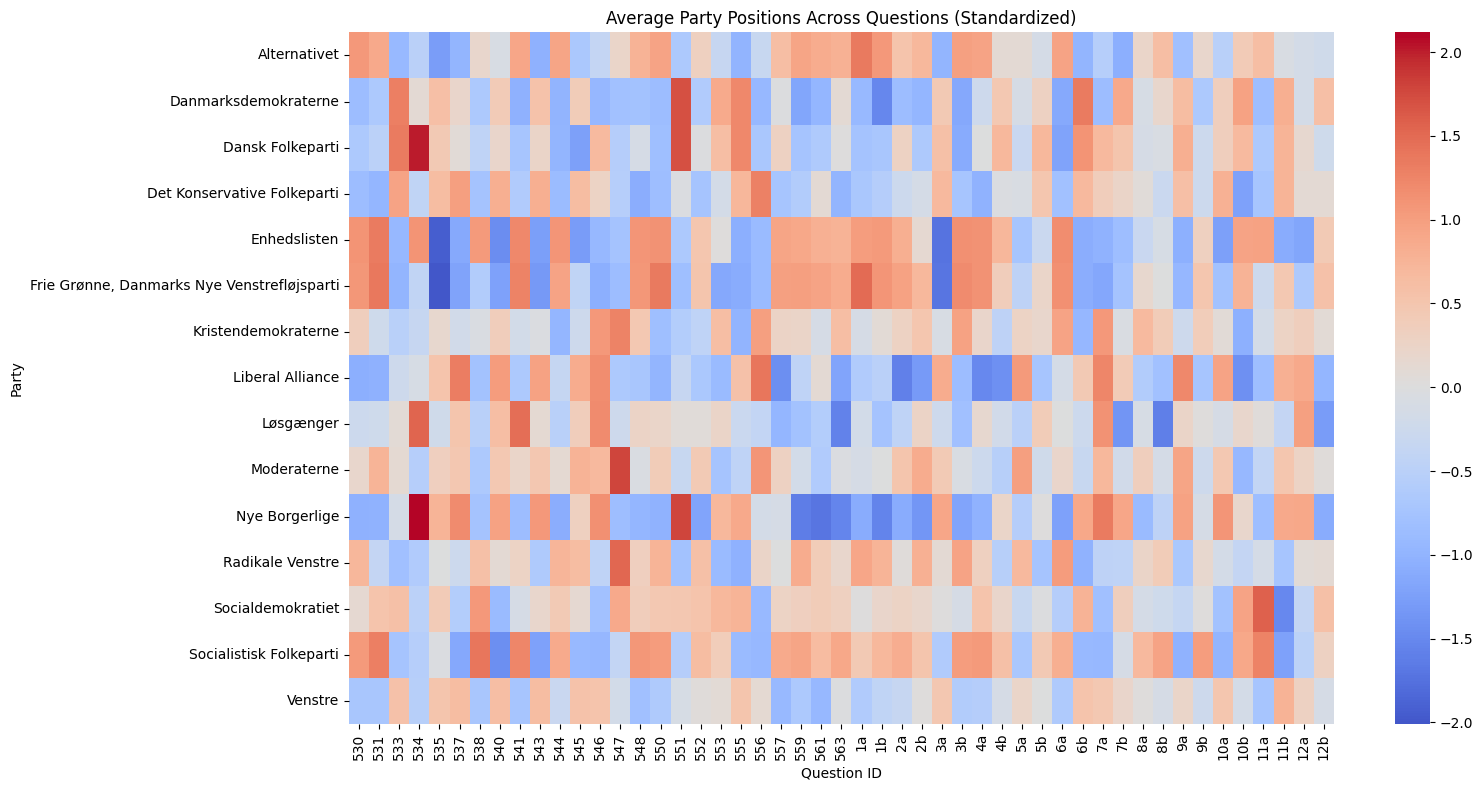

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(party_means, cmap="coolwarm", center=0, xticklabels=True, yticklabels=True)
plt.title("Average Party Positions Across Questions (Standardized)")
plt.xlabel("Question ID")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for plotting clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

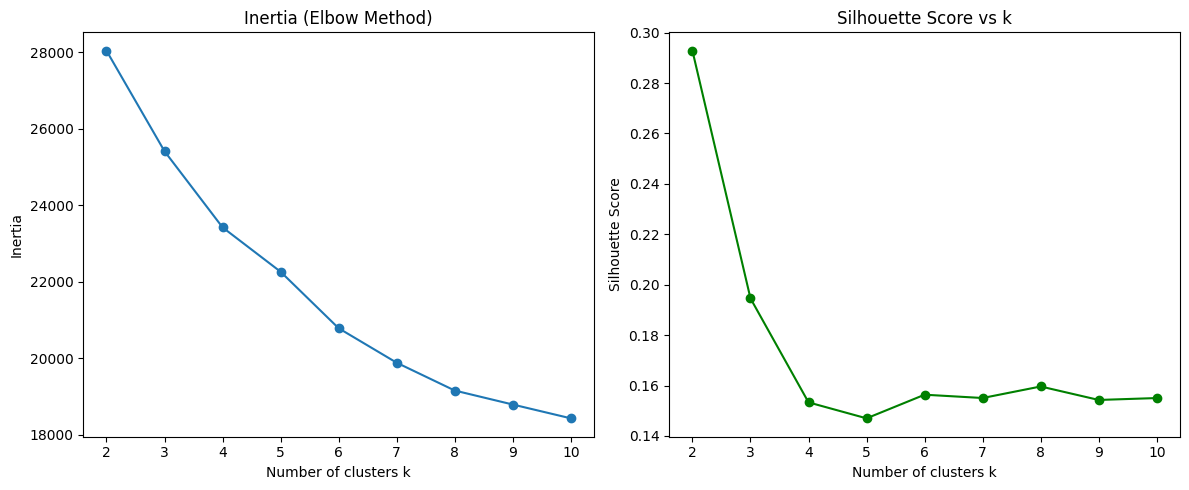

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, labels))

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title('Inertia (Elbow Method)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

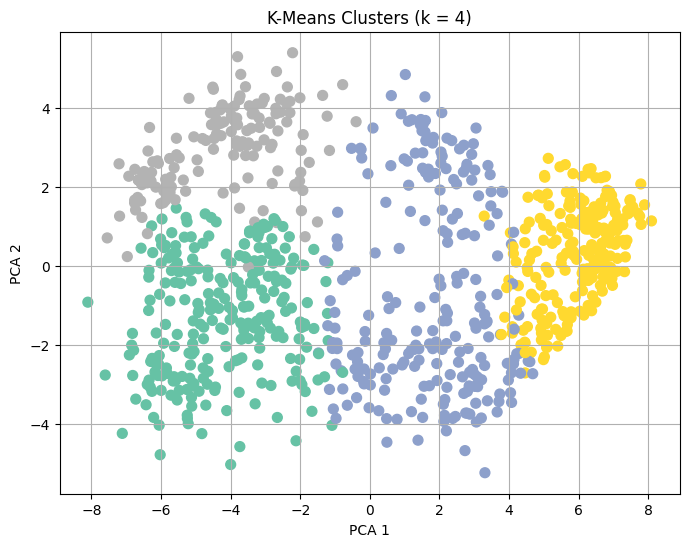

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Plot in 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', s=50)
plt.title('K-Means Clusters (k = 4)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

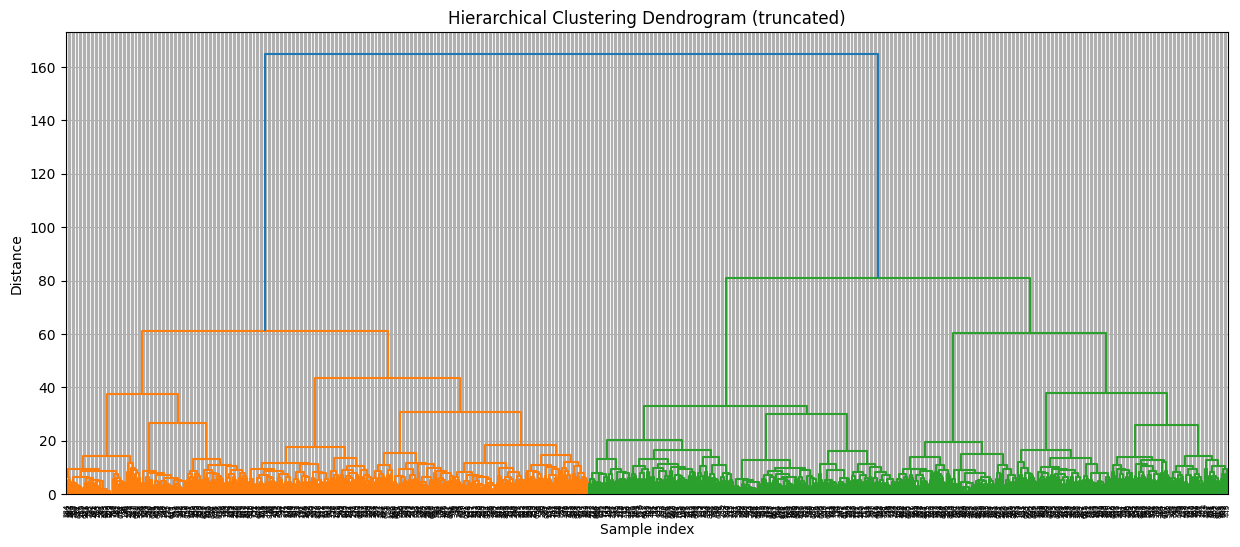

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute linkage matrix using Ward's method (minimizes variance within clusters)
linkage_matrix = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=30)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

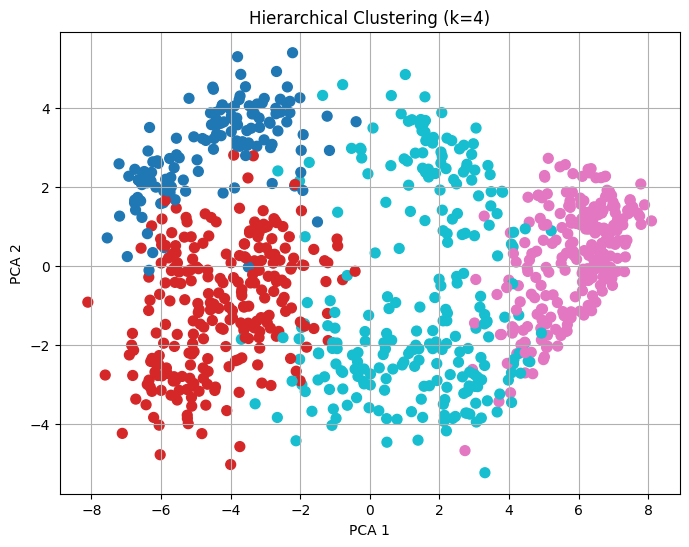

In [9]:
from scipy.cluster.hierarchy import fcluster

# Form flat clusters from the linkage matrix (e.g., 4 clusters)
hc_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='tab10', s=50)
plt.title('Hierarchical Clustering (k=4)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.5, min_samples=4)  # or try eps=3.0
db_labels = dbscan.fit_predict(df_scaled)

print("Clusters:", len(set(db_labels)) - (1 if -1 in db_labels else 0))
print("Noise points:", list(db_labels).count(-1))

Clusters: 4
Noise points: 353


In [24]:
import numpy as np

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:", n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 353


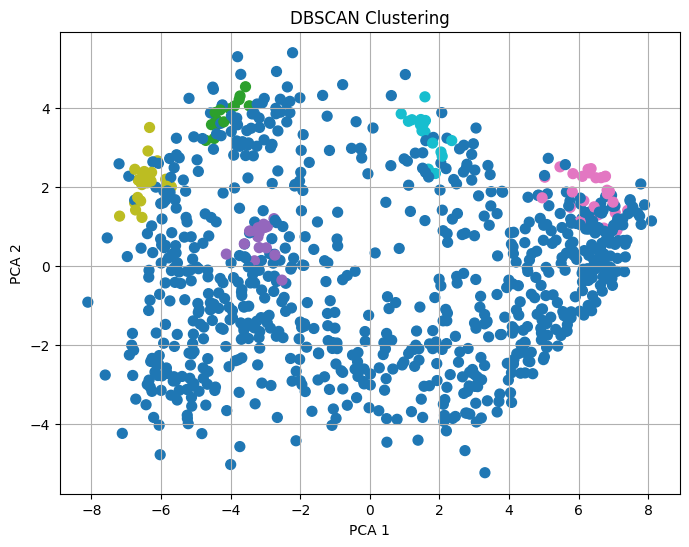

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [25]:
df_with_kmeans = df[["navn", "parti"]].copy()
df_with_kmeans["kmeans_cluster"] = kmeans.labels_

pd.crosstab(df_with_kmeans["kmeans_cluster"], df_with_kmeans["parti"])

df_with_dbscan = df_with_dbscan[df_with_dbscan["dbscan_cluster"] != -1]

NameError: name 'df_with_dbscan' is not defined